In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from numpy import exp as e
from numpy import sum
from numpy import log as ln
from numpy import genfromtxt

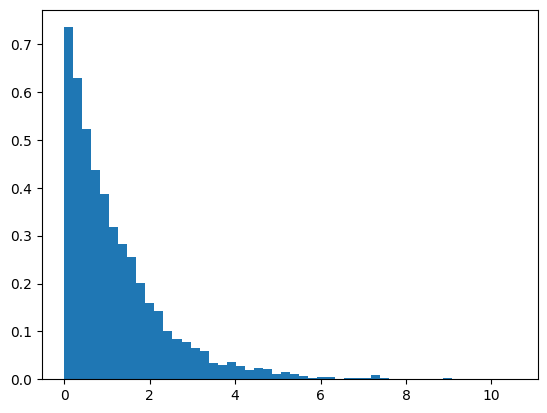

In [108]:

x = genfromtxt('time_until_phone_drop_exam_4k.csv', delimiter=',')

plt.hist(x, bins=50, density=True)
plt.show()

In [109]:

n = x.shape[0]
mu = np.mean(x)

def ln_p(theta):
    return n*ln(theta) - theta * sum(x)

def delta_ln_p(theta):
    return n/theta - sum(x)


In [110]:

theta = 2
step_size = 0.0001

for i in range(100):
    theta = theta + step_size * delta_ln_p(theta)

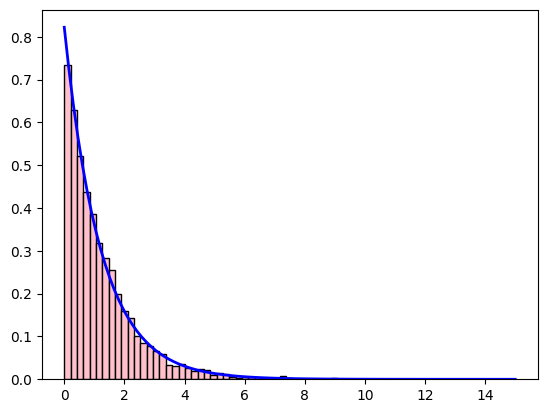

In [111]:
plt.hist(x, bins=50, density=True, color="pink", edgecolor='black')
x = np.linspace(0,15, 100)
y = theta*e(-theta*x)
plt.plot(x, y, color='blue', linewidth=2)
plt.show()

In [112]:
print('Mean Method, best θ = 1/μ = %.3f'%(1/mu))
print('Maximum Likelihood, best θ = %.3f'%theta)
print('Prob of drop within 2 years %.3f'%expon.cdf(2, 0, mu))
print('Time until 90 percent of the population dropped their phone %.3f'%expon.ppf(0.9, 0, mu))

Mean Method, best θ = 1/μ = 0.822
Maximum Likelihood, best θ = 0.822
Prob of drop within 2 years 0.807
Time until 90 percent of the population dropped their phone 2.800


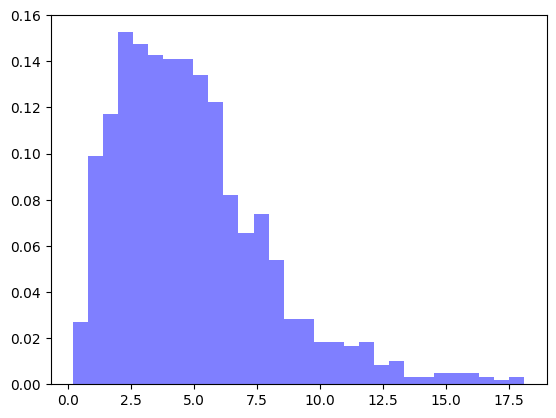

In [113]:
from scipy.stats import chi2, gaussian_kde


np.random.seed(0)

df = 5

num_samples = 1000
X = np.random.chisquare(df, num_samples)

plt.hist(X, bins=30, density=True, alpha=0.5, color='blue')
plt.show()

In [114]:
# Fitting the data w/ gaussian distribution
mu = np.mean(X)
sigma = np.std(X)

def gaussian(mu, sigma, x):
    return (np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))) / (np.sqrt(2 * np.pi)* sigma)

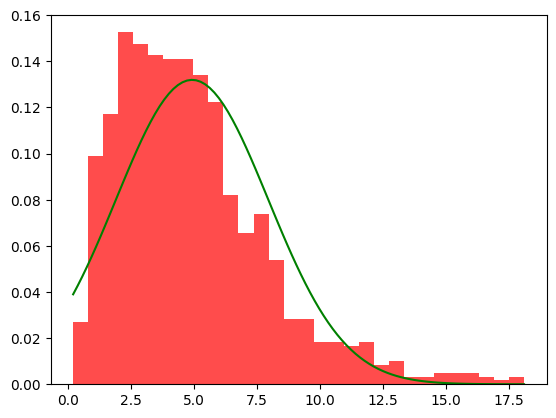

In [115]:
x = np.linspace(np.min(X),np.max(X),100)
y = gaussian(mu,sigma,x)
plt.plot(x,y,color = 'green')
hist = plt.hist(X,bins = 30, alpha=0.7,color='red',density=True)


In [116]:
pdf = 0
sigma = 0.4
